In [1]:
import numpy as np
import scipy as sp
import csv
import matplotlib.pyplot as plt

In [18]:
%matplotlib widget

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calibration line (long lambda): 1.1598767908481025*x + -4338.201471427266
calibration line (short lambda): 1.1598767908481025*x + -4338.201471427266


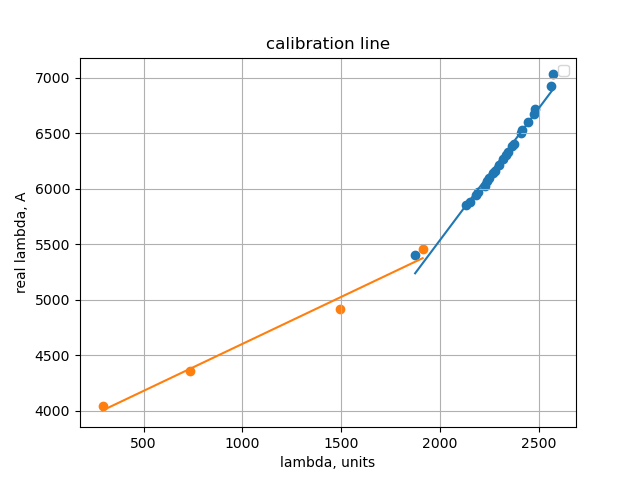

In [65]:
units, lambdas = [], []
with open('neon.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        units.append(float(row['lambda, units']))
        lambdas.append(float(row['lambda, A']))
lambdas.sort()
units.sort()
plt.figure()
plt.scatter(units, lambdas)
pol1 = np.polyfit(units, lambdas, deg=1)
print (f"calibration line (long lambda): {pol[0]}*x + {pol[1]}")
xs = np.linspace(min(units), max(units), 100)
plt.plot(xs, np.polyval(pol1, xs))

lambdas, units = [], []
with open('mercury.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        units.append(float(row['lambda, units']))
        lambdas.append(float(row['lambda, A']))
lambdas.sort()
units.sort()
units = units[:4]
lambdas = lambdas[:4]
border = units[-1]
plt.scatter(units, lambdas)
pol2 = np.polyfit(units, lambdas, deg=1)
print (f"calibration line (short lambda): {pol[0]}*x + {pol[1]}")
xs = np.linspace(min(units), max(units), 100)
plt.plot(xs, np.polyval(pol2, xs))
plt.title("calibration line")
plt.legend()
plt.grid()
plt.ylabel("real lambda, A")
plt.xlabel("lambda, units")
plt.savefig("calibration.png")

In [99]:
H2units = []
with open('hydrogen.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        H2units.append(float(row['lambda, units']))
print(H2units)
H2lambdas = np.array([np.polyval(pol1, unit) if unit > border else np.polyval(pol2, unit) for unit in H2units])
print(H2lambdas)
print(f"H_b/H_a = {(H2lambdas[0] - H2lambdas[1])/H2lambdas[0]}")
print(f"H_c/H_b = {(H2lambdas[1] - H2lambdas[2])/H2lambdas[1]}")
with open('hydrogen-corrected.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["lambda, A", "num"])
    for i in range(len(H2lambdas)):
        writer.writerow([H2lambdas[i], i])

[2428.0, 1440.0, 806.0]
[6556.48717089 4976.66398775 4439.74239669]
H_b/H_a = 0.24095573467437947
H_c/H_b = 0.10788785266277783


In [94]:
Iunits = []
with open('iodine.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        Iunits.append(float(row['lamda, units']))
print(Iunits)
Ilambdas = np.array([np.polyval(pol1, unit) if unit > border else np.polyval(pol2, unit) for unit in Iunits])
print(Ilambdas)
with open('iodine-corrected.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["lambda, A", "num"])
    for i in range(len(Ilambdas)):
        writer.writerow([Ilambdas[i], i])

[2374.0, 2262.0, 2584.0, 572.0]
[6428.16361883 6162.0110664  6927.19965464 4241.57259809]
